# Calculation of diffusion coefficient using Green-Kubo relations
In order to obtain the diffusivity we may always write the mean square
displacement as

$\langle x^2(t) \rangle = \int_0^tdt'\int_0^tdt''\langle u(t')u(t'')\rangle$

where may apply the fact that since the average is over a stationary state $\langle u(t')u(t'')\rangle = \langle u(t' - t'')u(0)\rangle$. Writing $f(t) = \langle u(t)u(0)\rangle$ the above expression takes the form

$\langle x^2(t) \rangle = \int_0^tdt'\int_0^tdt''f(t'-t'') = \int_0^tdt'\int_{-t'}^{t-t'}d\tau f(\tau)$

if we substitute $\tau = t'' - t'$. Doing the $t'$-integration by parts gives

$\langle x^2(t) \rangle = t \int_0^t d\tau f(\tau) + \int_{-t'}^{t-t'} dt' t'(f(t-t') - f(t'))$

where we have used that $f(t)$ is an even function in $t$. By adding and subtracting $t$ to $t'$ in the second integral and doing a trivial substitution, we get

$\langle x^2 \rangle = 2t \int_0^t d\tau f(\tau) - 2 \int_0^td\tau \tau f(\tau)$.

Now, if these integrals converge in the $t\to \infty$ limit, the behaviour is diffusive as $\langle x^2(t)\rangle \propto t$, and we may define the diffusivity as usual as 

$D = \lim_{t\to\infty} \frac{\langle x^2(t)\rangle}{2t} = \lim_{t\to\infty} \Big(\int_0^t d\tau f(\tau) - \frac{1}{t}\int_0^td\tau \tau f(\tau)\Big) \approx\int_0^\infty d\tau f(\tau).$

The relation

$D = \int_0^\infty d\tau \langle u(\tau) u(0) \rangle$

is a Green-Kubo relation. The integrand on the right hand side is called the velocity auto correlation function as it correlates velocities between time $t$ and $t=0$. When this is integrated for all times, we get the diffusion coefficient. We can use [compute vacf](https://docs.lammps.org/compute_vacf.html) to calculate this quantity.


In [1]:
# Add lammps_logfile to available packages.
# This is a workaround since the lammps-logfile
# needs to be updated. This requirement will go away later.
import sys
sys.path.append('/drive')
%pip install pandas

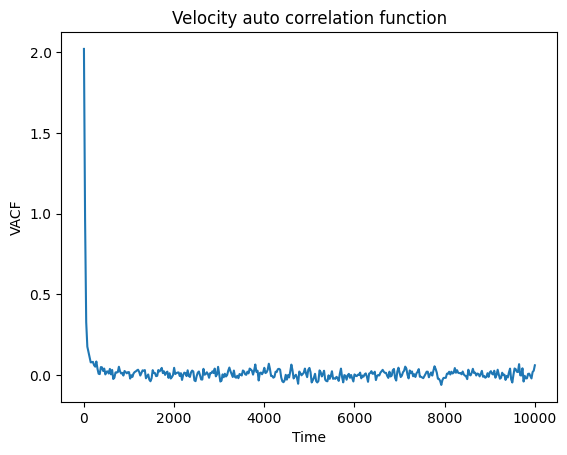

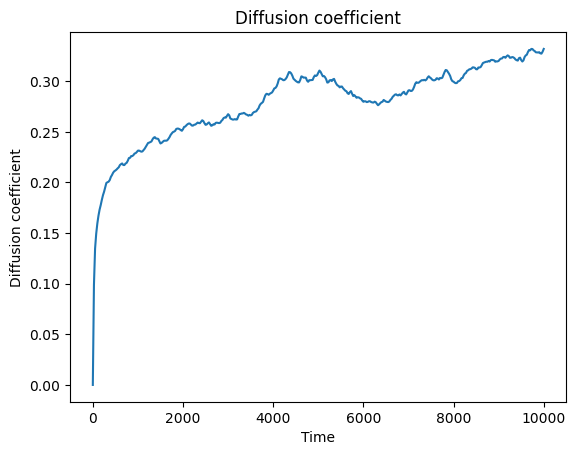

In [2]:
import lammps_logfile
import matplotlib.pyplot as plt

log = lammps_logfile.File("log.lammps")
step = log.get("Step")
plt.figure()

plt.plot(step, log.get("c_vacf[4]"))
plt.xlabel('Time')
plt.ylabel('VACF')
plt.title('Velocity auto correlation function')
plt.show()

plt.figure()
plt.plot(step, log.get("v_diffusioncoeff"))
plt.xlabel('Time')
plt.ylabel('Diffusion coefficient')
plt.title('Diffusion coefficient')

plt.show()